<a href="https://colab.research.google.com/github/koji/AI-Colab-Notebooks/blob/main/AMD_Nitro_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install diffusers==0.32.2 transformers==4.49.0 accelerate==1.7.0 wandb torchmetrics pycocotools torchmetrics[image] mosaicml-streaming==0.11.0 beautifulsoup4 tabulate timm==0.9.1 pyarrow einops omegaconf sentencepiece==0.2.0 pandas==2.2.3 alive-progress

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [3]:
!git clone https://github.com/AMD-AGI/Nitro-E.git

Cloning into 'Nitro-E'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 53 (delta 9), reused 35 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 3.12 MiB | 8.22 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [5]:
!cd Nitro-E/

In [11]:
!ls

assets	configs  core  datasets  LICENSE  README.md  scripts  train.py


In [16]:
import torch
from core.tools.inference_pipe import init_pipe

device = torch.device('cuda:0')
dtype = torch.bfloat16
repo_name = "amd/Nitro-E"

#resolution = 512
#ckpt_name = 'Nitro-E-512px.safetensors'

# for 1024px model
resolution = 1024
ckpt_name = 'Nitro-E-1024px.safetensors'

use_grpo = True

if use_grpo:
    pipe = init_pipe(device, dtype, resolution, repo_name=repo_name, ckpt_name=ckpt_name, ckpt_path_grpo='ckpt_grpo_512px')
else:
    pipe = init_pipe(device, dtype, resolution, repo_name=repo_name, ckpt_name=ckpt_name)
prompt = 'A dog protects a baby from predetors'
images = pipe(prompt=prompt, width=resolution, height=resolution, num_inference_steps=20, guidance_scale=4.5).images

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.



  0%|          | 0/20 [00:00<?, ?it/s]

Image saved to generated_images/image_1.png


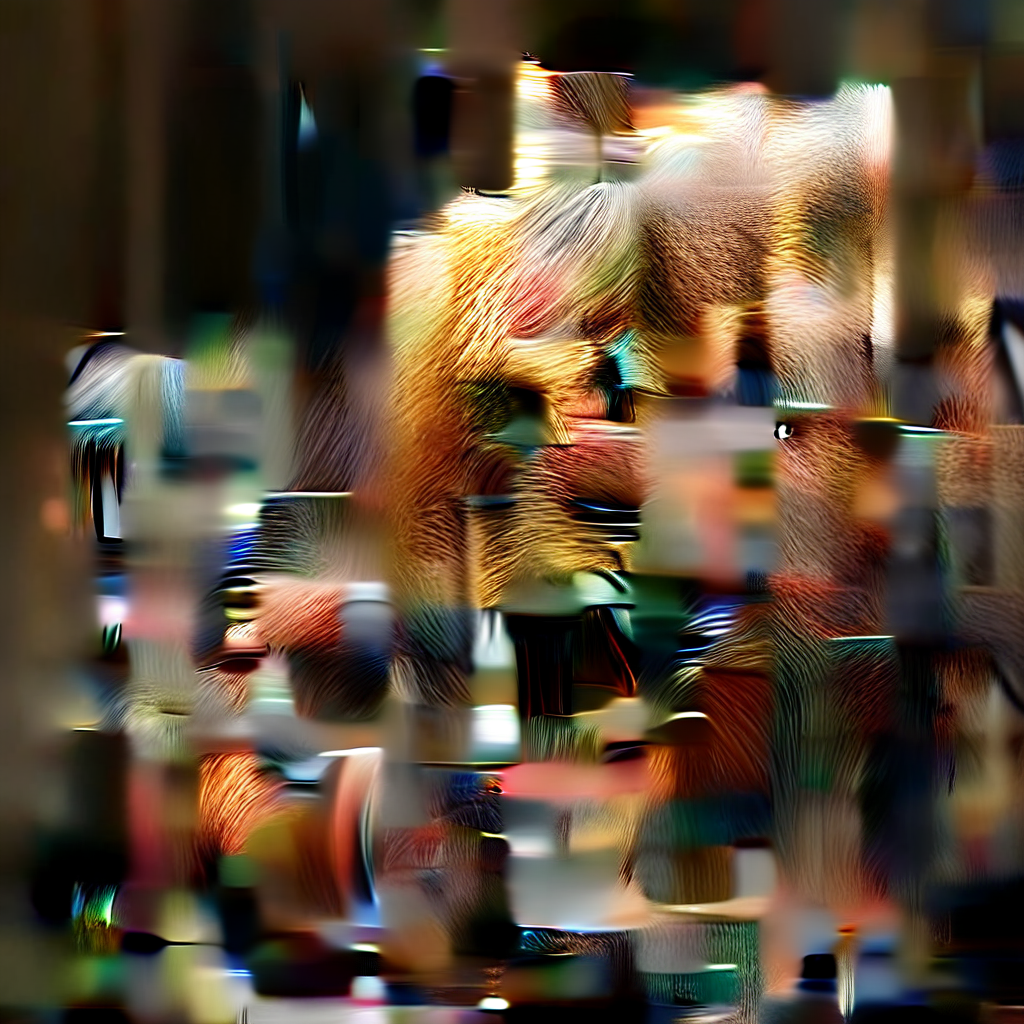

In [17]:
import os

# Create a directory to save the images
if not os.path.exists('generated_images'):
    os.makedirs('generated_images')

# Save and display the images
for i, image in enumerate(images):
    image_path = f'generated_images/image_{i+1}.png'
    image.save(image_path)
    print(f"Image saved to {image_path}")
    display(image)